In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz as pgv
import collections
import matplotlib

# Récupération des données

In [16]:
table = pd.read_table("finalelise.csv", sep = ',')

In [17]:
table.head()

,alignment_length,q._start,q._end,s._start,s._end,inversion,v_num,edges_med,edges_med2,edges_CO92,edges_CO922
0,382372,16870,389421,420187,802559,False,med_1,389421,643273,389421,643273
1,159651,484786,643273,1108903,949252,True,med_2_inv,484786,733701,484786,733701
2,173956,733701,894591,1147883,1321839,False,med_3,894591,927055,894591,927055
3,487623,927055,1412918,1310047,1797670,False,med_4,1412918,1399804,1412918,2324487
4,769902,1399804,2169494,1976938,2746840,False,med_5,2169494,2324487,2169494,2332594


In [18]:
table.shape

(18, 11)

Name: Graph médieval
Type: DiGraph
Number of nodes: 35
Number of edges: 18
Average in degree:   0.5143
Average out degree:   0.5143


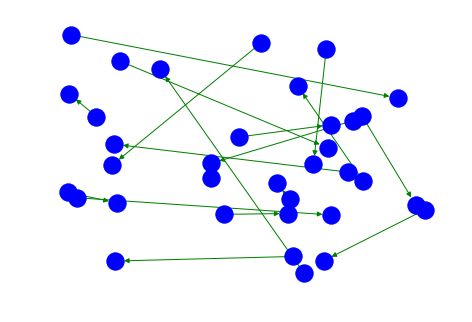

In [39]:
#Creation of networkx instance
G = nx.DiGraph()
for i in range(len(table['edges_med'])):
    G.add_edge(table['edges_med'][i], table['edges_med2'][i])
sp = nx.spring_layout(G)
sp2=nx.nx_agraph.graphviz_layout(G)
G.name = 'Graph médieval'
print(nx.info(G))
nx.draw_random(G, node_color='b', edge_color='g')

In [40]:
# edges liste
edges_liste = []
for i in range(len(table['edges_med'])):
    tup = (table['edges_med'][i], table['edges_med2'][i])
    edges_liste.append(tup)

In [41]:
nodes_liste = []
for i in range(len(table['edges_med'])):
    nodes_liste.append(table['edges_med'][i])
    nodes_liste.append(table['edges_med2'][i])

In [42]:
len(nodes_liste)

36

Name: Graph médieval
Type: DiGraph
Number of nodes: 35
Number of edges: 18
Average in degree:   0.5143
Average out degree:   0.5143


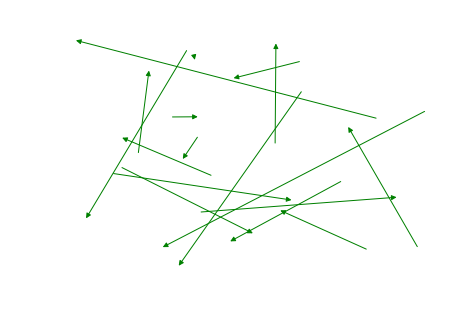

In [43]:
#Creation of networkx instance
G = nx.DiGraph()
for i in range(len(table['edges_med'])):
    G.add_edge(table['edges_med'][i], table['edges_med2'][i])
sp = nx.spring_layout(G)
sp2=nx.nx_agraph.graphviz_layout(G)
G.name = 'Graph médieval'
print(nx.info(G))
nx.draw_random(G,node_color='', edge_color='g')

Name: Graph CO92
Type: DiGraph
Number of nodes: 35
Number of edges: 18
Average in degree:   0.5143
Average out degree:   0.5143


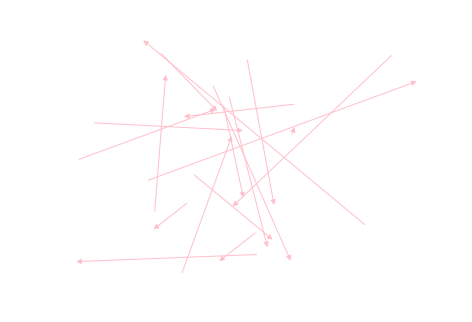

In [44]:
#Creation of networkx instance
G2 = nx.DiGraph()
for i in range(len(table['edges_CO92'])):
    G2.add_edge(table['edges_CO92'][i], table['edges_CO922'][i])
sp = nx.spring_layout(G2)
sp2=nx.nx_agraph.graphviz_layout(G2)
G2.name = 'Graph CO92'
print(nx.info(G2))
nx.draw_random(G2, node_color='', edge_color='pink')

In [45]:
G2.edges()

OutEdgeView([(2678667, 3004646), (484786, 733701), (2169494, 2332594), (2234520, 1399804), (2876573, 2677956), (2963077, 2811931), (389421, 643273), (3221940, 3250940), (1412918, 2324487), (3611580, 3599594), (3528444, 16870), (2794698, 2535472), (3925329, 4154327), (2469606, 2839924), (3523706, 4443103), (4388351, 3611580), (4576893, 3682392), (894591, 927055)])

In [48]:
Union = nx.compose(G,G2)
Union.nodes()
Union.edges()

OutEdgeView([(2678667, 2677956), (2678667, 3004646), (484786, 733701), (2169494, 2332594), (2169494, 2324487), (2234520, 2332594), (2234520, 1399804), (2876573, 2677956), (2876573, 2839924), (2963077, 2811931), (2963077, 3004646), (389421, 643273), (3221940, 3250940), (1412918, 1399804), (1412918, 2324487), (3611580, 3682392), (3611580, 3599594), (2794698, 2535472), (2794698, 2811931), (3925329, 4154327), (2469606, 2535472), (2469606, 2839924), (3523706, 3599594), (3523706, 4443103), (894591, 927055), (3528444, 3528444), (3528444, 16870), (4576893, 3682392), (4576893, 16870), (4388351, 3611580), (4388351, 4443103)])

In [49]:
set(G.nodes()).difference(set(G2.nodes()))

set()

In [50]:
set(G2.nodes()).difference(set(G.nodes()))

set()

In [51]:
set(G.edges()).difference(set(G2.edges()))

{(1412918, 1399804),
 (2169494, 2324487),
 (2234520, 2332594),
 (2469606, 2535472),
 (2678667, 2677956),
 (2794698, 2811931),
 (2876573, 2839924),
 (2963077, 3004646),
 (3523706, 3599594),
 (3528444, 3528444),
 (3611580, 3682392),
 (4388351, 4443103),
 (4576893, 16870)}

In [52]:
set(G2.edges()).difference(set(G.edges()))

{(1412918, 2324487),
 (2169494, 2332594),
 (2234520, 1399804),
 (2469606, 2839924),
 (2678667, 3004646),
 (2794698, 2535472),
 (2876573, 2677956),
 (2963077, 2811931),
 (3523706, 4443103),
 (3528444, 16870),
 (3611580, 3599594),
 (4388351, 3611580),
 (4576893, 3682392)}

In [53]:

pink_edges = list(G.edges())
blue_edges = list(G2.edges())


In [54]:
gUnion = nx.DiGraph()
gUnion.add_nodes_from(G.nodes())
gUnion.add_edges_from(G.edges())
gUnion.add_edges_from(G2.edges())
nodes = list(gUnion.nodes())

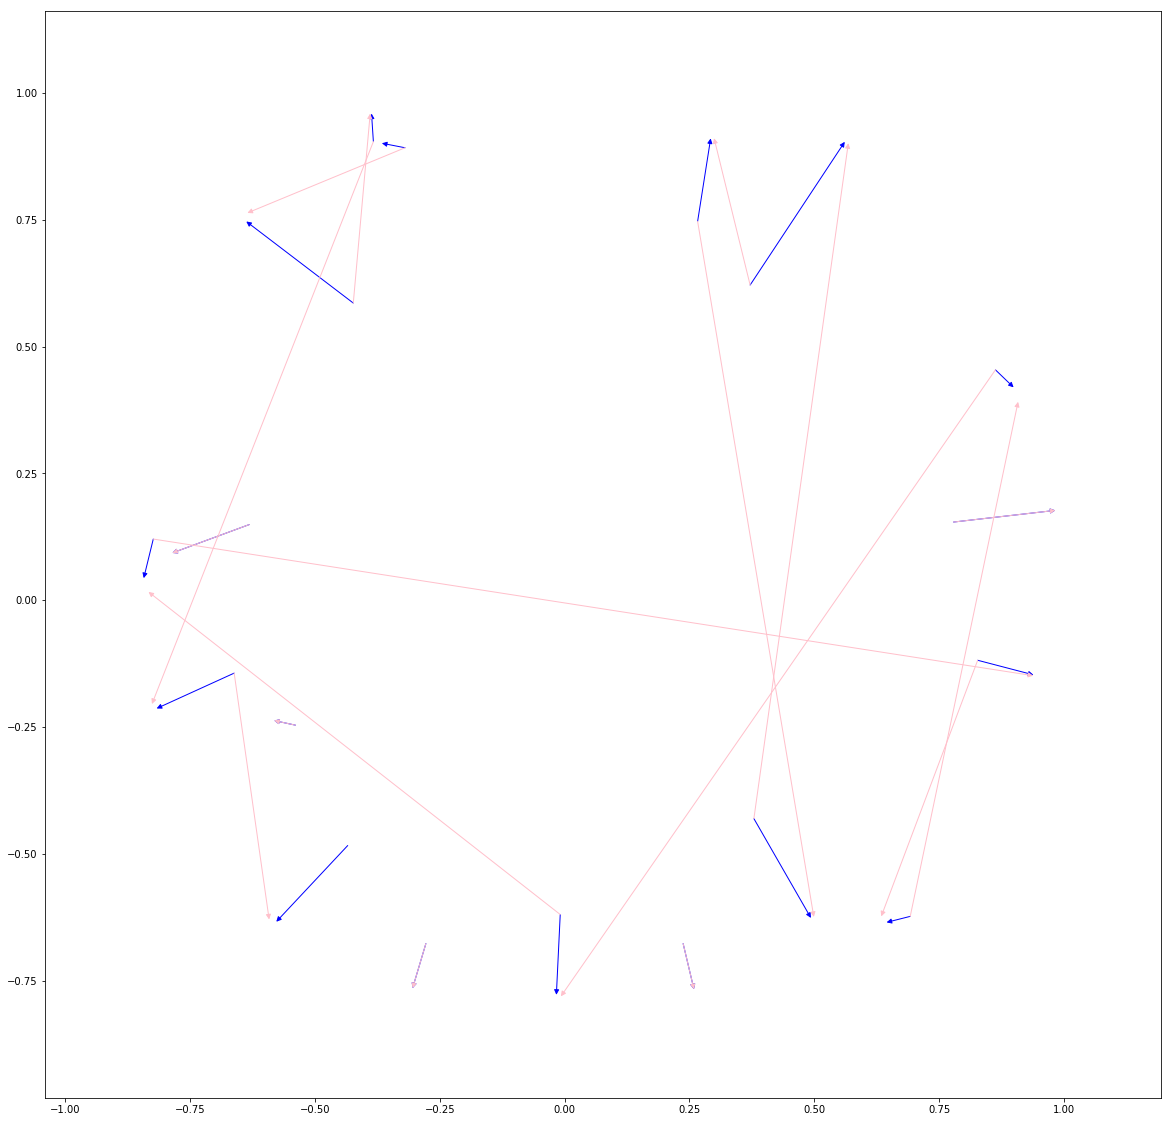

In [57]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(gUnion)
plt.figure(figsize=(20,20))
nx.draw_networkx_edges(gUnion, edgelist= blue_edges, 
                       edge_color = 'b',  pos = sp, with_labels = False)
nx.draw_networkx_edges(gUnion, edgelist= pink_edges, 
                       edge_color = 'pink',  pos = sp, with_labels = False)

In [58]:
print(nx.info(gUnion))

Name: 
Type: DiGraph
Number of nodes: 35
Number of edges: 31
Average in degree:   0.8857
Average out degree:   0.8857


Name: 
Type: Graph
Number of nodes: 35
Number of edges: 31
Average degree:   1.7714


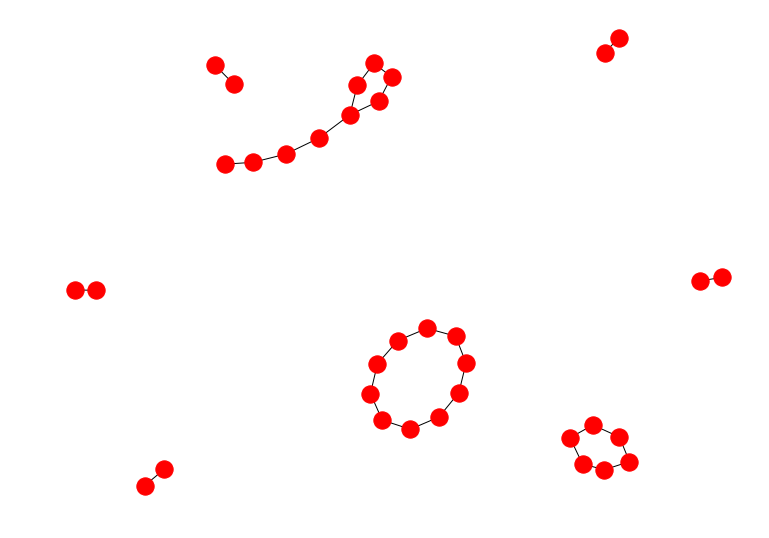

In [79]:
finalGraph=gUnion.to_undirected()
print(nx.info(finalGraph))
plt.figure(figsize=(10,7))
nx.draw(finalGraph)

In [70]:
list(nx.cycle_basis(finalGraph))

[[1412918, 1399804, 2234520, 2332594, 2169494, 2324487],
 [2677956,
  2876573,
  2839924,
  2469606,
  2535472,
  2794698,
  2811931,
  2963077,
  3004646,
  2678667],
 [3599594, 3523706, 4443103, 4388351, 3611580],
 [3528444]]

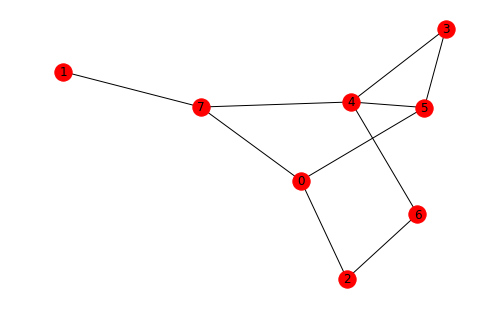

In [59]:
petersen=nx.sedgewick_maze_graph()
nx.draw(petersen, with_labels=True)


In [72]:
list(nx.cycle_basis(petersen))

[[5, 4, 7, 0], [2, 6, 4, 7, 0], [5, 3, 4]]